In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r'NSEI - DATA\NSEI.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-19,5274.200195,5287.799805,5218.649902,5225.649902,5225.649902,0.0
1,2010-01-20,5226.100098,5256.700195,5201.399902,5221.700195,5221.700195,0.0
2,2010-01-21,5220.200195,5220.350098,5085.450195,5094.149902,5094.149902,0.0
3,2010-01-22,5094.149902,5094.149902,4954.850098,5036.000000,5036.000000,0.0
4,2010-01-25,5034.549805,5035.700195,4983.049805,5007.899902,5007.899902,0.0
...,...,...,...,...,...,...,...
3437,2023-12-12,21018.550781,21037.900391,20867.150391,20906.400391,20906.400391,244900.0
3438,2023-12-13,20929.750000,20950.000000,20769.500000,20926.349609,20926.349609,260300.0
3439,2023-12-14,21110.400391,21210.900391,21074.449219,21182.699219,21182.699219,334400.0
3440,2023-12-15,21287.449219,21492.300781,21235.300781,21456.650391,21456.650391,508800.0


In [4]:
data.isnull().sum()

Date          0
Open         27
High         27
Low          27
Close        27
Adj Close    27
Volume       27
dtype: int64

In [5]:
# Check missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Date         0.000000
Open         0.784428
High         0.784428
Low          0.784428
Close        0.784428
Adj Close    0.784428
Volume       0.784428
dtype: float64


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3415.000000,3415.000000,3415.000000,3415.000000,3415.000000,3.415000e+03
mean,10075.958641,10125.526779,10009.685978,10068.859434,10068.859434,2.314233e+05
std,4401.163064,4414.958246,4379.197388,4398.895607,4398.895607,2.108237e+05
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,6032.925049,6068.024902,5984.750000,6021.675049,6021.675049,1.177000e+05
50%,8793.599609,8822.099609,8732.900391,8776.000000,8776.000000,1.933000e+05
75%,11928.850098,11971.450195,11852.100097,11914.300293,11914.300293,2.957000e+05
max,21434.800781,21492.300781,21365.349609,21456.650391,21456.650391,1.811000e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442 entries, 0 to 3441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3442 non-null   object 
 1   Open       3415 non-null   float64
 2   High       3415 non-null   float64
 3   Low        3415 non-null   float64
 4   Close      3415 non-null   float64
 5   Adj Close  3415 non-null   float64
 6   Volume     3415 non-null   float64
dtypes: float64(6), object(1)
memory usage: 188.4+ KB


In [8]:
df = data.copy()

In [9]:
#### To simplify the process taken a dataset copy , if any changes made in the dataset it will not affect the original dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-19,5274.200195,5287.799805,5218.649902,5225.649902,5225.649902,0.0
1,2010-01-20,5226.100098,5256.700195,5201.399902,5221.700195,5221.700195,0.0
2,2010-01-21,5220.200195,5220.350098,5085.450195,5094.149902,5094.149902,0.0
3,2010-01-22,5094.149902,5094.149902,4954.850098,5036.000000,5036.000000,0.0
4,2010-01-25,5034.549805,5035.700195,4983.049805,5007.899902,5007.899902,0.0
...,...,...,...,...,...,...,...
3437,2023-12-12,21018.550781,21037.900391,20867.150391,20906.400391,20906.400391,244900.0
3438,2023-12-13,20929.750000,20950.000000,20769.500000,20926.349609,20926.349609,260300.0
3439,2023-12-14,21110.400391,21210.900391,21074.449219,21182.699219,21182.699219,334400.0
3440,2023-12-15,21287.449219,21492.300781,21235.300781,21456.650391,21456.650391,508800.0


In [10]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [11]:
# Converting 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
# Extracting  day of week
df['Day'] = df['Date'].dt.day_name()
df

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2010-01-19,5274.200195,5287.799805,5218.649902,5225.649902,5225.649902,0.0,Tuesday
1,2010-01-20,5226.100098,5256.700195,5201.399902,5221.700195,5221.700195,0.0,Wednesday
2,2010-01-21,5220.200195,5220.350098,5085.450195,5094.149902,5094.149902,0.0,Thursday
3,2010-01-22,5094.149902,5094.149902,4954.850098,5036.000000,5036.000000,0.0,Friday
4,2010-01-25,5034.549805,5035.700195,4983.049805,5007.899902,5007.899902,0.0,Monday
...,...,...,...,...,...,...,...,...
3437,2023-12-12,21018.550781,21037.900391,20867.150391,20906.400391,20906.400391,244900.0,Tuesday
3438,2023-12-13,20929.750000,20950.000000,20769.500000,20926.349609,20926.349609,260300.0,Wednesday
3439,2023-12-14,21110.400391,21210.900391,21074.449219,21182.699219,21182.699219,334400.0,Thursday
3440,2023-12-15,21287.449219,21492.300781,21235.300781,21456.650391,21456.650391,508800.0,Friday


In [13]:
# Stock markets don’t operate on weekends, so data for Saturday & Sunday should be removed 
df = df[~df['Date'].dt.day_name().isin(['Saturday', 'Sunday'])]

In [14]:
df.isnull().sum()

Date          0
Open         18
High         18
Low          18
Close        18
Adj Close    18
Volume       18
Day           0
dtype: int64

In [15]:
# Now, for the remaining missing values, the best method is Forward Fill (ffill). This method works well in stock market data because -
   #  - previous day's price is a logical estimate for the missing day's price.
df.fillna(method='ffill', inplace=True)
df

C:\Users\CHANDAN\AppData\Local\Temp\ipykernel_5868\4221724339.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\CHANDAN\AppData\Local\Temp\ipykernel_5868\4221724339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2010-01-19,5274.200195,5287.799805,5218.649902,5225.649902,5225.649902,0.0,Tuesday
1,2010-01-20,5226.100098,5256.700195,5201.399902,5221.700195,5221.700195,0.0,Wednesday
2,2010-01-21,5220.200195,5220.350098,5085.450195,5094.149902,5094.149902,0.0,Thursday
3,2010-01-22,5094.149902,5094.149902,4954.850098,5036.000000,5036.000000,0.0,Friday
4,2010-01-25,5034.549805,5035.700195,4983.049805,5007.899902,5007.899902,0.0,Monday
...,...,...,...,...,...,...,...,...
3437,2023-12-12,21018.550781,21037.900391,20867.150391,20906.400391,20906.400391,244900.0,Tuesday
3438,2023-12-13,20929.750000,20950.000000,20769.500000,20926.349609,20926.349609,260300.0,Wednesday
3439,2023-12-14,21110.400391,21210.900391,21074.449219,21182.699219,21182.699219,334400.0,Thursday
3440,2023-12-15,21287.449219,21492.300781,21235.300781,21456.650391,21456.650391,508800.0,Friday


In [16]:
df[df['Volume'] == 0].count() / len(df) * 100

Date         22.341975
Open         22.341975
High         22.341975
Low          22.341975
Close        22.341975
Adj Close    22.341975
Volume       22.341975
Day          22.341975
dtype: float64

#### Since i am building a real-time SIP & investment recommendation system, our model needs accurate trading volume data to make informed decisions.
####     Forward-filling (ffill) or rolling mean may introduce artificial trends that were not originally present., we were dealing with 759 rows of  zero ####            volume. Since we are dropping the Volume column
#### Though further we wont be needing the Day column we are Dropping it

In [17]:
df = df.drop(columns=['Volume','Day'])
df

,Date,Open,High,Low,Close,Adj Close
0,2010-01-19,5274.200195,5287.799805,5218.649902,5225.649902,5225.649902
1,2010-01-20,5226.100098,5256.700195,5201.399902,5221.700195,5221.700195
2,2010-01-21,5220.200195,5220.350098,5085.450195,5094.149902,5094.149902
3,2010-01-22,5094.149902,5094.149902,4954.850098,5036.000000,5036.000000
4,2010-01-25,5034.549805,5035.700195,4983.049805,5007.899902,5007.899902
...,...,...,...,...,...,...
3437,2023-12-12,21018.550781,21037.900391,20867.150391,20906.400391,20906.400391
3438,2023-12-13,20929.750000,20950.000000,20769.500000,20926.349609,20926.349609
3439,2023-12-14,21110.400391,21210.900391,21074.449219,21182.699219,21182.699219
3440,2023-12-15,21287.449219,21492.300781,21235.300781,21456.650391,21456.650391


In [18]:
df.duplicated().sum()

np.int64(0)

# EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

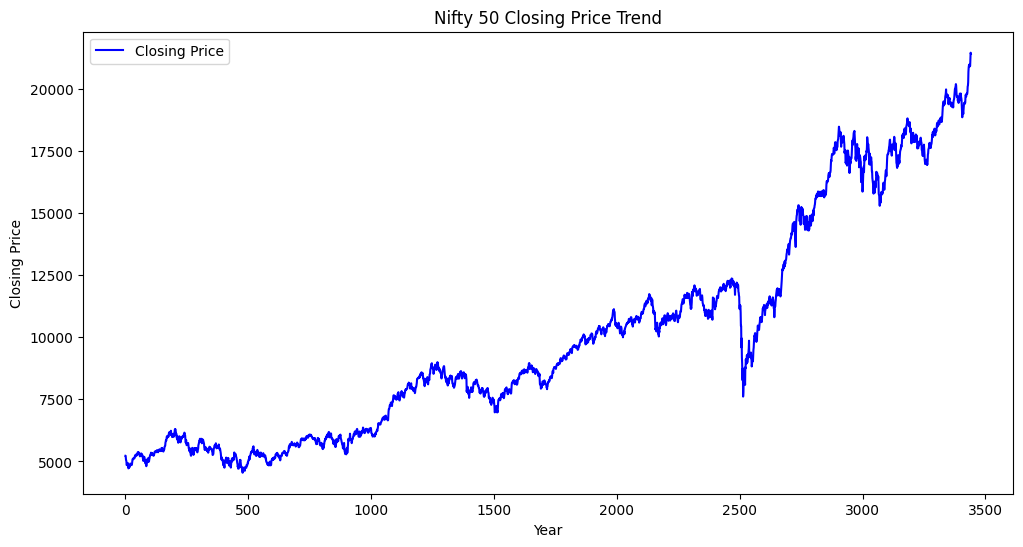

In [20]:
# Plot closing price trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.title("Nifty 50 Closing Price Trend")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [21]:
# Rolling Mean & Standard Deviation
rolling_mean = df['Close'].rolling(window=50).mean()
rolling_std = df['Close'].rolling(window=50).std()


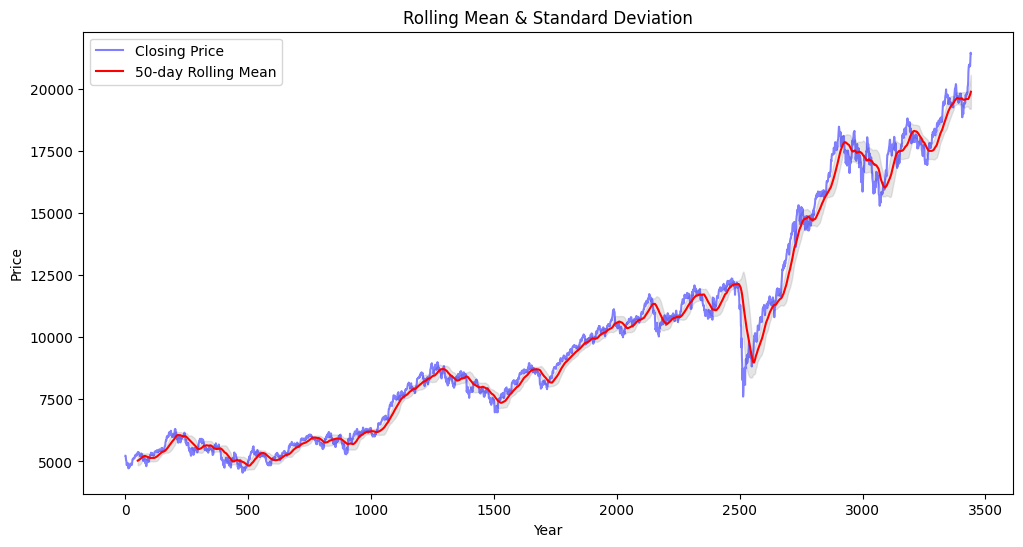

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(rolling_mean, label='50-day Rolling Mean', color='red')
plt.fill_between(df.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='gray', alpha=0.2)
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

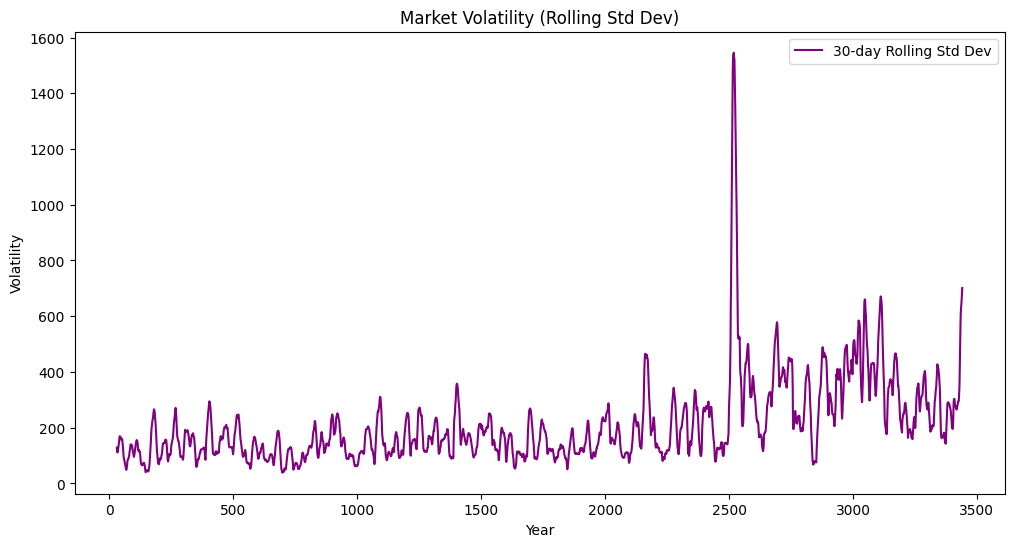

In [23]:
# Market Volatility using Rolling Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'].rolling(window=30).std(), label='30-day Rolling Std Dev', color='purple')
plt.title("Market Volatility (Rolling Std Dev)")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.legend()
plt.show()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose


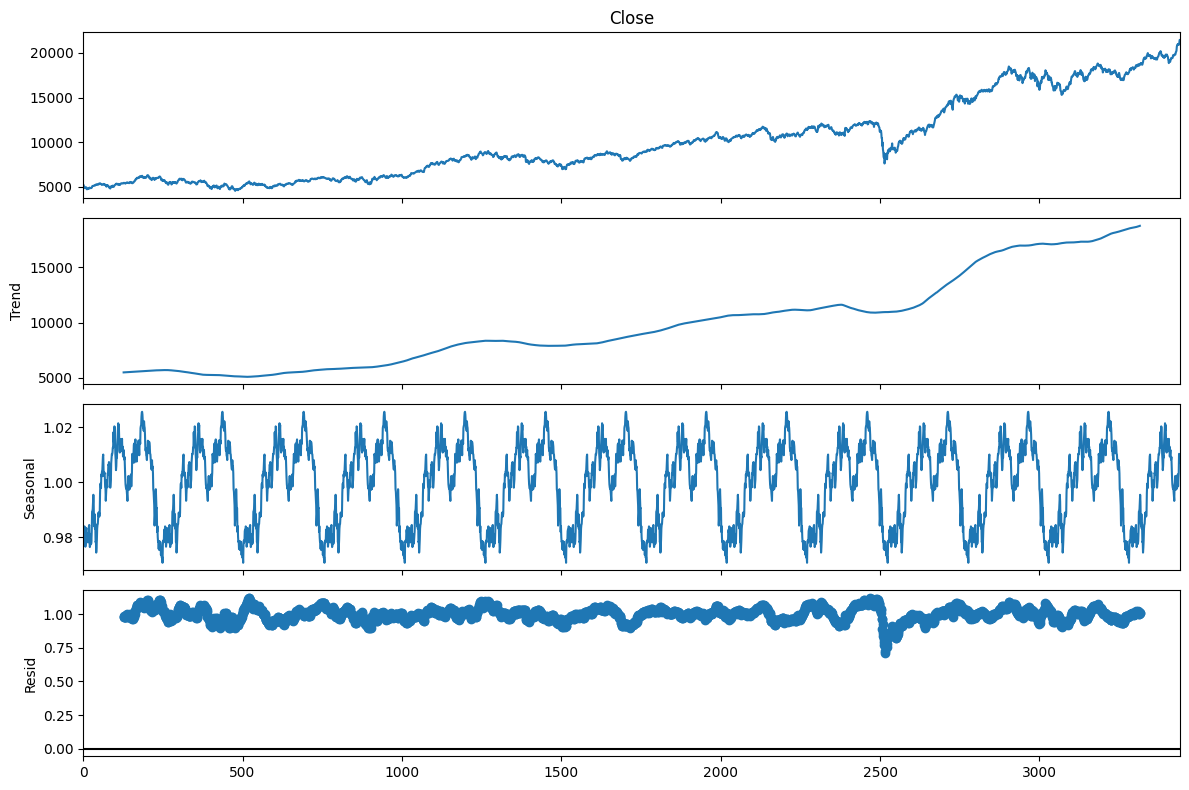

In [25]:
# Seasonal Decomposition
result = seasonal_decompose(df['Close'], model='multiplicative', period=252)
plt.rcParams.update({'figure.figsize': (12, 8)})
result.plot()
plt.show()


#### The seasonal component shows repeating cyclical patterns over fixed intervals. This indicates that the data exhibits systematic patterns (like periodic market behaviors) across time.

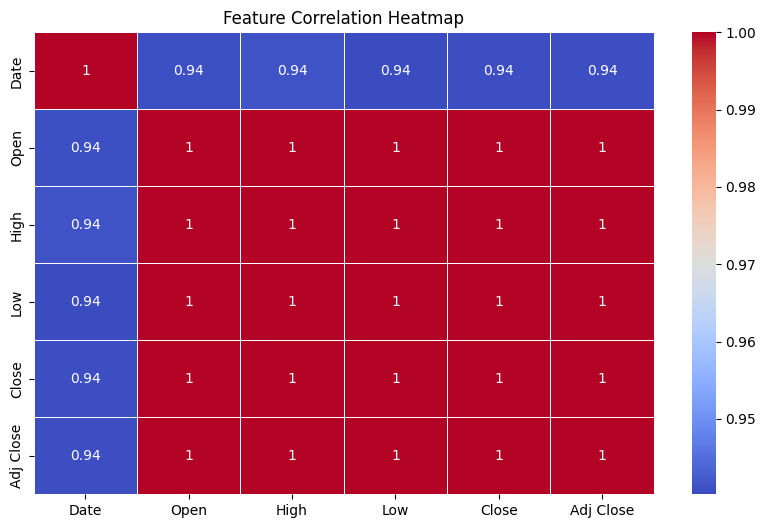

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

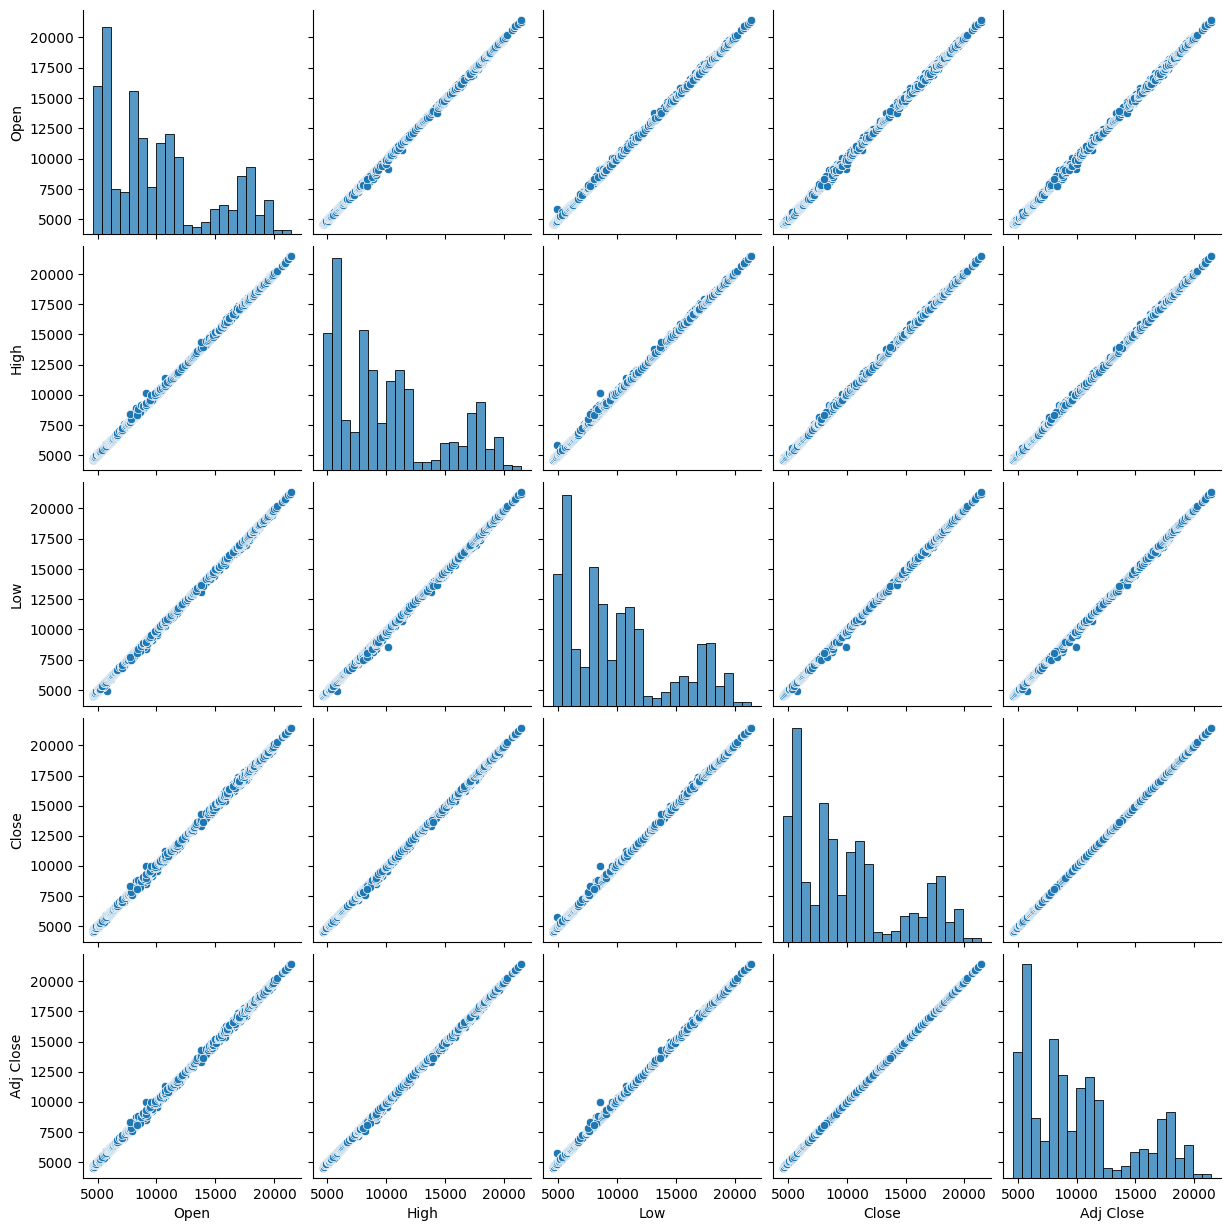

In [27]:
# Pairplot
sns.pairplot(df)
plt.show()


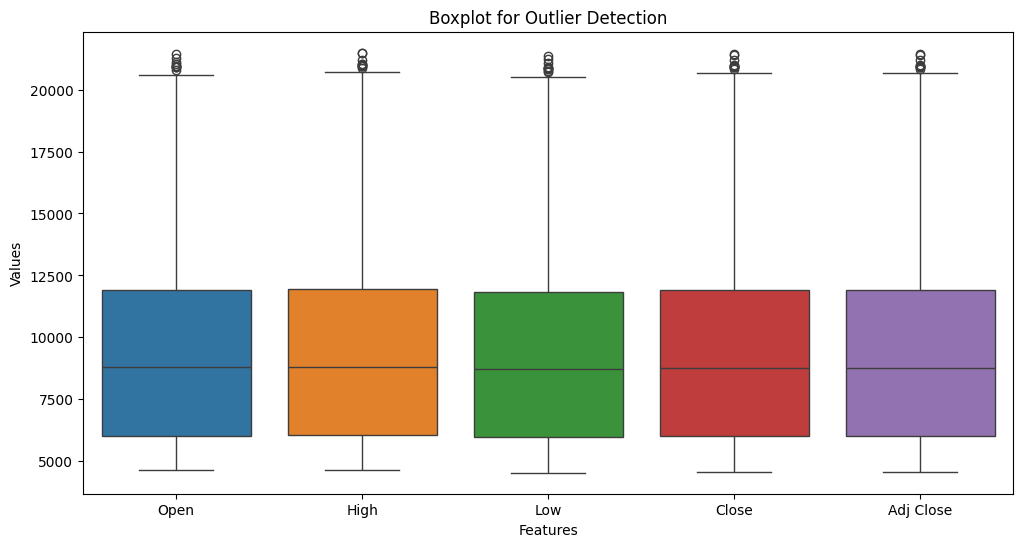

In [28]:
# Boxplot for detecting outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Adj Close']])
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot for Outlier Detection")
plt.show()

# over all EDA outcomes

# over all EDA outcomes
 1. The closing price of Nifty 50 has been increasing over the years.
 2. The 50-day rolling mean and standard deviation show the trend of closing prices.
 3. The market volatility has increased in recent years.
 4. The data has a strong positive correlation between the features.
 5. The boxplot shows the presence of outliers in the data.
 6. The pairplot shows the relationship between the features.
 7. The seasonal decomposition plot shows the trend, seasonality, and residuals of the closing price.
 8. The data is ready for further analysis and modeling.

# Outlier detection and its treatment

In [29]:
# to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25%)
    Q3 = data[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Checking for outliers in key columns
for col in ["Open", "High", "Low", "Close", "Adj Close"]:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    print(f"Column: {col} - Outliers detected: {len(outliers)} (Lower: {lb}, Upper: {ub})")


Column: Open - Outliers detected: 10 (Lower: -2805.2253414999986, Upper: 20750.9758305)
Column: High - Outliers detected: 10 (Lower: -2793.1499010000016, Upper: 20810.049315000004)
Column: Low - Outliers detected: 10 (Lower: -2799.5747075, Upper: 20618.6245125)
Column: Close - Outliers detected: 10 (Lower: -2820.1010739999992, Upper: 20748.301269999996)
Column: Adj Close - Outliers detected: 10 (Lower: -2820.1010739999992, Upper: 20748.301269999996)


In [30]:
# Capping extreme values using IQR method
for col in ["Open", "High", "Low", "Close", "Adj Close"]:
    _, lb, ub = detect_outliers_iqr(df, col)
    df[col] = np.clip(df[col], lb, ub)  # Replacing outliers with threshold values

Text(0.5, 1.0, 'Boxplot after Outlier Treatment')

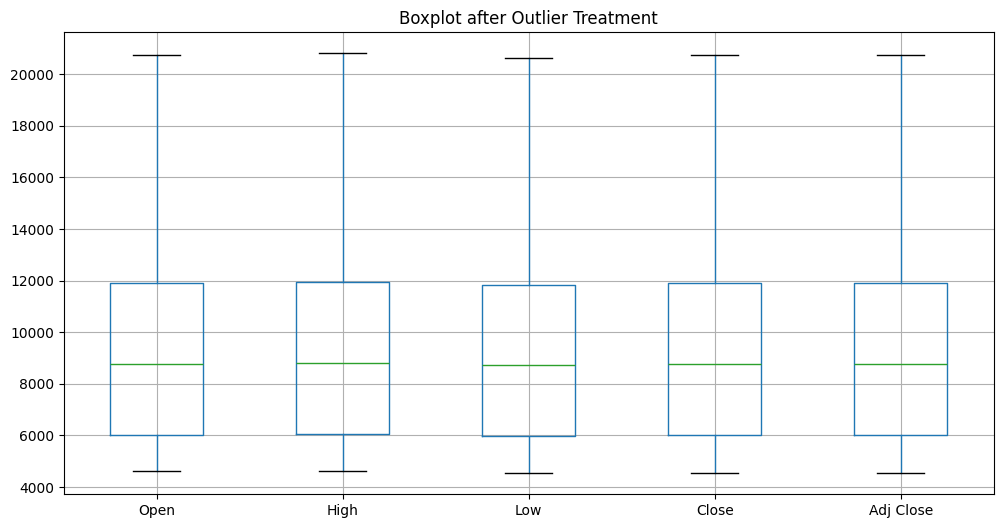

In [31]:
df.boxplot(column=["Open", "High", "Low", "Close", "Adj Close"], figsize=(12, 6))
plt.title("Boxplot after Outlier Treatment")

# Feature Engineering

In [32]:
df

,Date,Open,High,Low,Close,Adj Close
0,2010-01-19,5274.200195,5287.799805,5218.649902,5225.649902,5225.649902
1,2010-01-20,5226.100098,5256.700195,5201.399902,5221.700195,5221.700195
2,2010-01-21,5220.200195,5220.350098,5085.450195,5094.149902,5094.149902
3,2010-01-22,5094.149902,5094.149902,4954.850098,5036.000000,5036.000000
4,2010-01-25,5034.549805,5035.700195,4983.049805,5007.899902,5007.899902
...,...,...,...,...,...,...
3437,2023-12-12,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270
3438,2023-12-13,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270
3439,2023-12-14,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270
3440,2023-12-15,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270


In [33]:
# Feature Engineering - Adding Technical Indicators
def add_technical_indicators(data):
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    RS = gain / loss
    data['RSI_14'] = 100 - (100 / (1 + RS))
    data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
    data['BB_Upper'] = data['SMA_20'] + (data['Close'].rolling(window=20).std() * 2)
    data['BB_Lower'] = data['SMA_20'] - (data['Close'].rolling(window=20).std() * 2)
    return data

In [34]:
df = add_technical_indicators(df)
df

,Date,Open,High,Low,Close,Adj Close,SMA_20,EMA_20,RSI_14,MACD,BB_Upper,BB_Lower
0,2010-01-19,5274.200195,5287.799805,5218.649902,5225.649902,5225.649902,NaN,5225.649902,NaN,0.000000,NaN,NaN
1,2010-01-20,5226.100098,5256.700195,5201.399902,5221.700195,5221.700195,NaN,5225.273739,NaN,-0.315076,NaN,NaN
2,2010-01-21,5220.200195,5220.350098,5085.450195,5094.149902,5094.149902,NaN,5212.785755,NaN,-10.733293,NaN,NaN
3,2010-01-22,5094.149902,5094.149902,4954.850098,5036.000000,5036.000000,NaN,5195.949016,NaN,-23.412135,NaN,NaN
4,2010-01-25,5034.549805,5035.700195,4983.049805,5007.899902,5007.899902,NaN,5178.039577,NaN,-35.320499,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3437,2023-12-12,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20153.295361,20255.620633,98.283591,336.835020,21101.619938,19204.970785
3438,2023-12-13,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20218.532886,20302.542599,98.233289,333.546166,21140.423804,19296.641968
3439,2023-12-14,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20272.175488,20344.995805,99.240217,327.168332,21185.827236,19358.523741
3440,2023-12-15,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20321.330591,20383.405850,100.000000,318.443040,21225.875145,19416.786037


In [35]:
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,SMA_20,EMA_20,RSI_14,MACD,BB_Upper,BB_Lower
20,2010-02-17,4858.649902,4929.700195,4857.600098,4914.000000,4914.000000,4906.112524,4909.476635,54.075209,-85.056957,5192.842287,4619.382761
21,2010-02-18,4915.100098,4922.049805,4873.700195,4887.750000,4887.750000,4889.217529,4907.407432,51.349928,-76.512869,5133.322996,4645.112062
22,2010-02-19,4887.299805,4887.299805,4805.549805,4844.899902,4844.899902,4870.377515,4901.454334,47.640827,-72.365083,5058.084415,4682.670615
23,2010-02-22,4849.350098,4912.049805,4845.899902,4856.399902,4856.399902,4858.490015,4897.163435,47.228603,-67.373341,5013.854422,4703.125607
24,2010-02-23,4856.600098,4884.100098,4833.149902,4870.049805,4870.049805,4850.192505,4894.581185,52.754204,-61.605763,4981.503972,4718.881038
...,...,...,...,...,...,...,...,...,...,...,...,...
3437,2023-12-12,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20153.295361,20255.620633,98.283591,336.835020,21101.619938,19204.970785
3438,2023-12-13,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20218.532886,20302.542599,98.233289,333.546166,21140.423804,19296.641968
3439,2023-12-14,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20272.175488,20344.995805,99.240217,327.168332,21185.827236,19358.523741
3440,2023-12-15,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20321.330591,20383.405850,100.000000,318.443040,21225.875145,19416.786037


In [36]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from xgboost import XGBRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# Splitting data for model training
X = df[['SMA_20', 'EMA_20', 'RSI_14', 'MACD', 'BB_Upper', 'BB_Lower']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# XGBoost Model Training
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [39]:
# XGBoost Accuracy Scores
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


In [40]:
print(mae_xgb) 
print(mse_xgb)
print(r2_xgb)

72.85148599258781
11436.397764944224
0.9993813828178773


In [41]:
# ARIMA Model Training (Using closing prices only)
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]
model_arima = ARIMA(train, order=(5,1,0))
model_fit = model_arima.fit()
pred_arima = model_fit.forecast(steps=len(test))

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Pytho

In [42]:
# ARIMA Accuracy Scores
mae_arima = mean_absolute_error(test, pred_arima)
mse_arima = mean_squared_error(test, pred_arima)
r2_arima = r2_score(test, pred_arima)

In [43]:
# Clustering using K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['KMeans_Cluster'] = kmeans_labels


In [44]:
# Clustering using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
df['DBSCAN_Cluster'] = dbscan_labels

In [45]:
# Displaying accuracy scores
print("XGBoost Accuracy Metrics:")
print(f"MAE: {mae_xgb}, MSE: {mse_xgb}, R2: {r2_xgb}")
print("\nARIMA Accuracy Metrics:")
print(f"MAE: {mae_arima}, MSE: {mse_arima}, R2: {r2_arima}")
print("\nK-Means Clustering:")
print(df['KMeans_Cluster'].value_counts())
print("\nDBSCAN Clustering:")
print(df['DBSCAN_Cluster'].value_counts())


XGBoost Accuracy Metrics:
MAE: 72.85148599258781, MSE: 11436.397764944224, R2: 0.9993813828178773

ARIMA Accuracy Metrics:
MAE: 2639.770175248435, MSE: 8807592.431537682, R2: -3.4057165714777717

K-Means Clustering:
KMeans_Cluster
0    1375
2    1307
1     732
Name: count, dtype: int64

DBSCAN Clustering:
DBSCAN_Cluster
-1    3414
Name: count, dtype: int64


In [46]:
from sklearn.metrics import accuracy_score

In [47]:
# Displaying accuracy scores for clustering
from sklearn.metrics import accuracy_score,silhouette_score 
print("\nClustering Metrics:")
print(f"KMeans Silhouette Score: {silhouette_score(X, kmeans_labels)}")



Clustering Metrics:
KMeans Silhouette Score: 0.6437590494152979


In [48]:
print("DBSCAN Unique Labels:", np.unique(dbscan_labels))

DBSCAN Unique Labels: [-1]


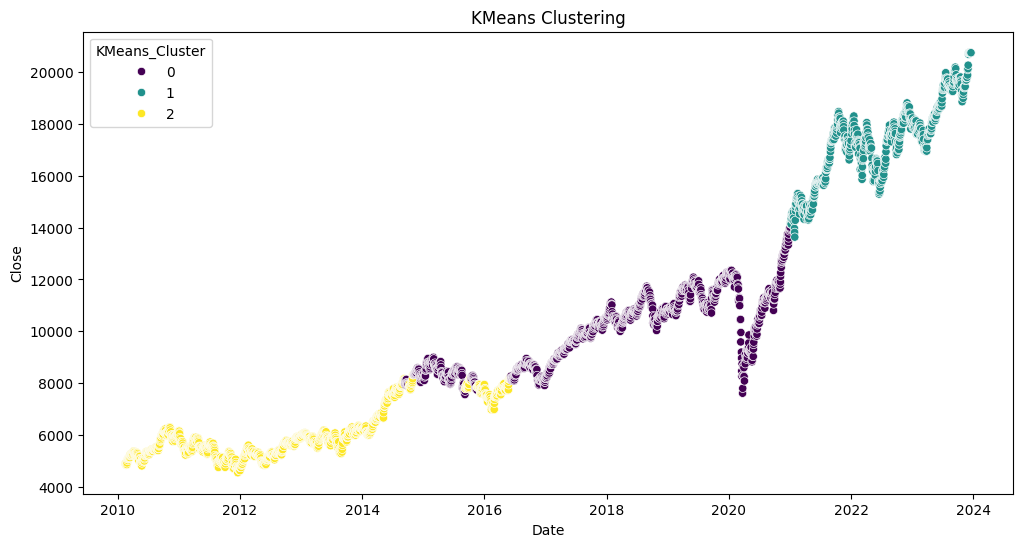

In [49]:
# Displaying the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Date', y='Close', hue='KMeans_Cluster', palette='viridis')
plt.title("KMeans Clustering")
plt.show()


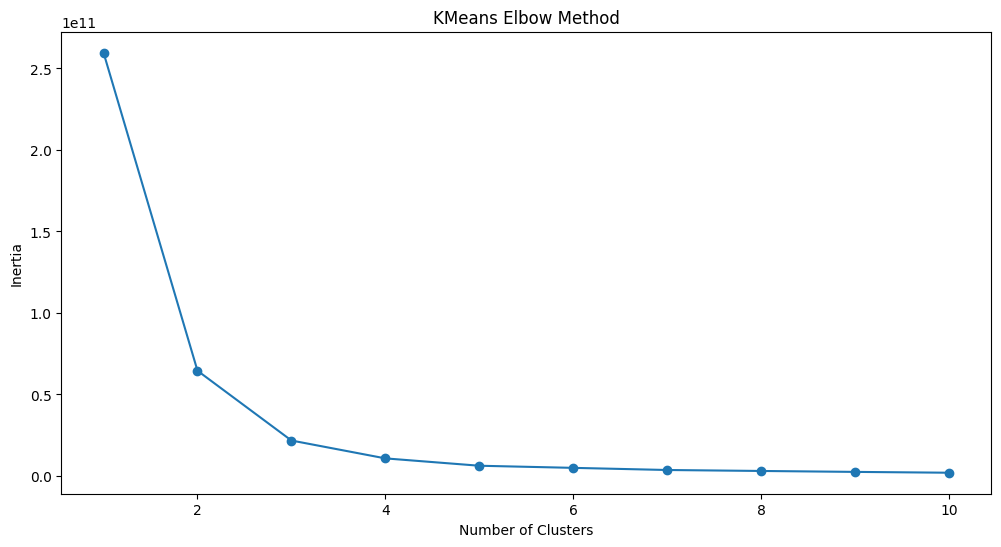

In [50]:
# kmeans model tuning
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("KMeans Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [51]:
# checking kmeans silhouette score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, kmeans_labels))

print(silhouette_scores)

[np.float64(0.6991415973357442), np.float64(0.6437590494152979), np.float64(0.7032262976084556), np.float64(0.6857712679161065), np.float64(0.6485913676273023), np.float64(0.6515092717747109), np.float64(0.5964842679755626), np.float64(0.5452879513029645), np.float64(0.5497536624821641)]


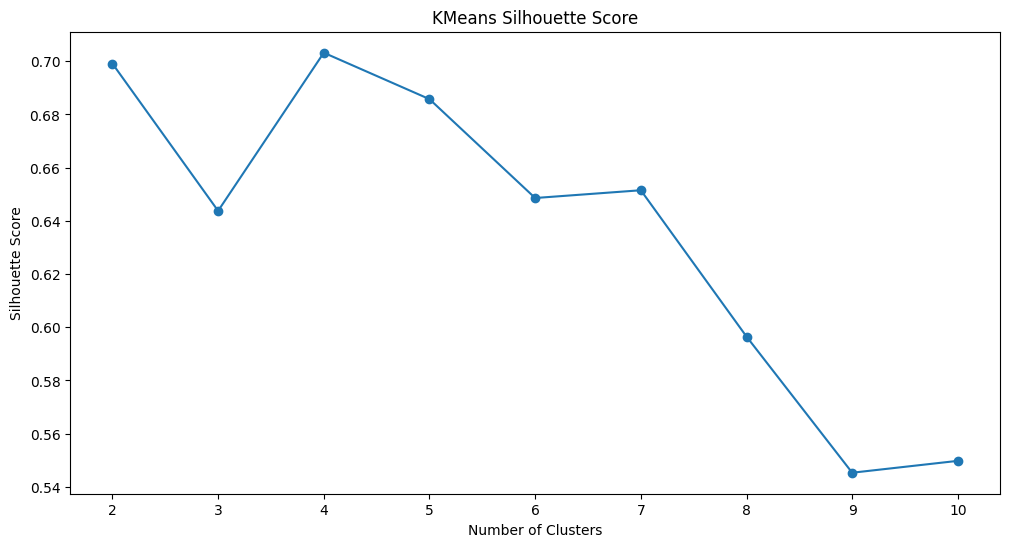

In [52]:
# Analogy to Elbow Method, we can use Silhouette Score to determine the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("KMeans Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [53]:
df

,Date,Open,High,Low,Close,Adj Close,SMA_20,EMA_20,RSI_14,MACD,BB_Upper,BB_Lower,KMeans_Cluster,DBSCAN_Cluster
20,2010-02-17,4858.649902,4929.700195,4857.600098,4914.000000,4914.000000,4906.112524,4909.476635,54.075209,-85.056957,5192.842287,4619.382761,2,-1
21,2010-02-18,4915.100098,4922.049805,4873.700195,4887.750000,4887.750000,4889.217529,4907.407432,51.349928,-76.512869,5133.322996,4645.112062,2,-1
22,2010-02-19,4887.299805,4887.299805,4805.549805,4844.899902,4844.899902,4870.377515,4901.454334,47.640827,-72.365083,5058.084415,4682.670615,2,-1
23,2010-02-22,4849.350098,4912.049805,4845.899902,4856.399902,4856.399902,4858.490015,4897.163435,47.228603,-67.373341,5013.854422,4703.125607,2,-1
24,2010-02-23,4856.600098,4884.100098,4833.149902,4870.049805,4870.049805,4850.192505,4894.581185,52.754204,-61.605763,4981.503972,4718.881038,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,2023-12-12,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20153.295361,20255.620633,98.283591,336.835020,21101.619938,19204.970785,1,-1
3438,2023-12-13,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20218.532886,20302.542599,98.233289,333.546166,21140.423804,19296.641968,1,-1
3439,2023-12-14,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20272.175488,20344.995805,99.240217,327.168332,21185.827236,19358.523741,1,-1
3440,2023-12-15,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20321.330591,20383.405850,100.000000,318.443040,21225.875145,19416.786037,1,-1


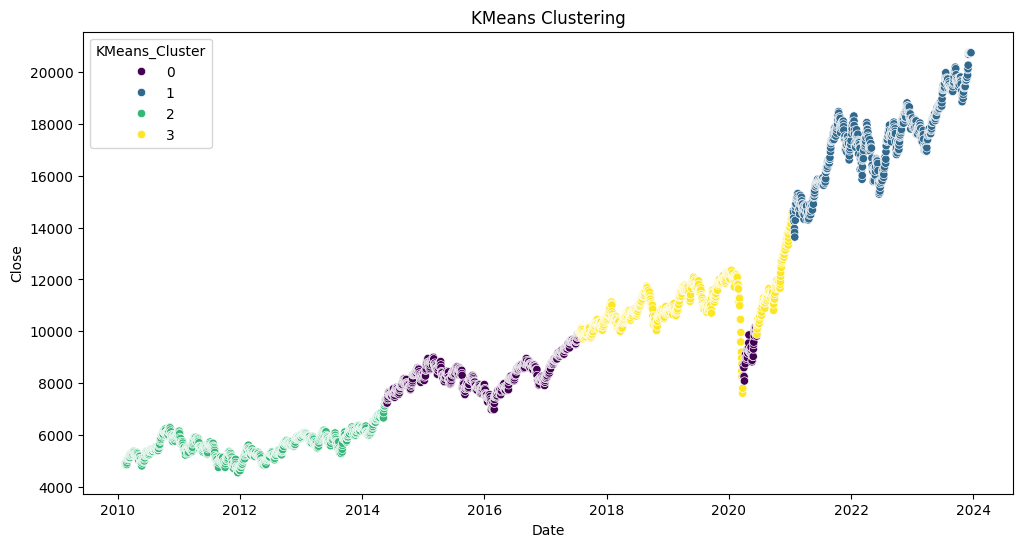

KMeans Silhouette Score: 0.7032262976084556


In [54]:
# kmeans model improvement
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['KMeans_Cluster'] = kmeans_labels

# Displaying the clusters

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Date', y='Close', hue='KMeans_Cluster', palette='viridis')
plt.title("KMeans Clustering")
plt.show()

# silhouette score
print(f"KMeans Silhouette Score: {silhouette_score(X, kmeans_labels)}")


In [55]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [56]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## DBSCAN improvising

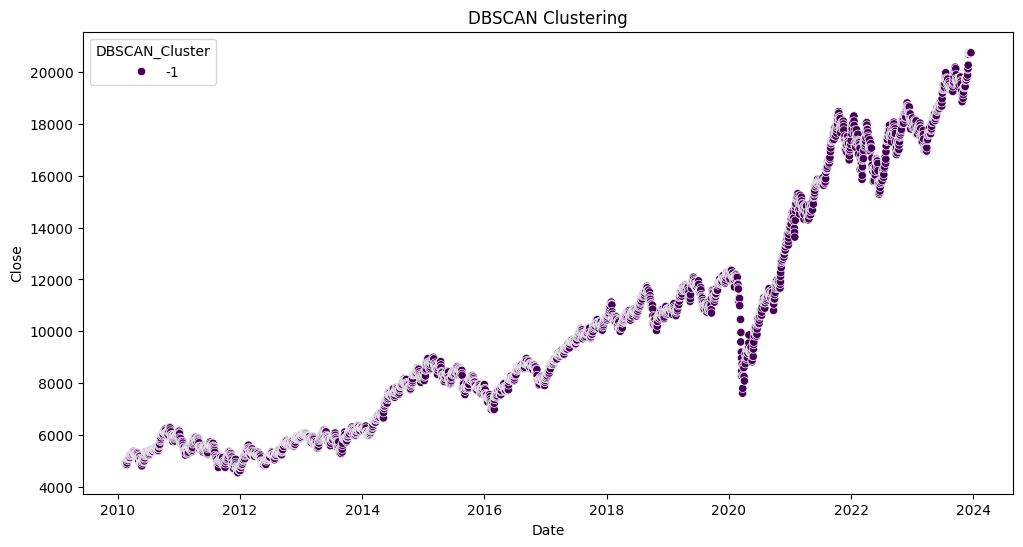

In [57]:
# Displaying the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Date', y='Close', hue='DBSCAN_Cluster', palette='viridis')
plt.title("DBSCAN Clustering")
plt.show()



In [58]:
for eps in np.arange(0.1, 1.0, 0.1):  # Try various eps values
    dbscan = DBSCAN(eps=eps, min_samples=5)  # Keep min_samples fixed for now
    labels = dbscan.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Count clusters
    n_noise = list(labels).count(-1)
    print(f"eps: {eps}, Clusters: {n_clusters}, Noise Points: {n_noise}")


eps: 0.1, Clusters: 0, Noise Points: 3414
eps: 0.2, Clusters: 0, Noise Points: 3414
eps: 0.30000000000000004, Clusters: 0, Noise Points: 3414
eps: 0.4, Clusters: 0, Noise Points: 3414
eps: 0.5, Clusters: 0, Noise Points: 3414
eps: 0.6, Clusters: 0, Noise Points: 3414
eps: 0.7000000000000001, Clusters: 0, Noise Points: 3414
eps: 0.8, Clusters: 0, Noise Points: 3414
eps: 0.9, Clusters: 0, Noise Points: 3414


In [59]:
# Normalizing the Data
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [60]:
# Clustering using DBSCAN with scaled data
for eps in np.arange(1.0, 5.0, 0.5):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)  # Using scaled data

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f"eps: {eps}, Clusters: {n_clusters}, Noise Points: {n_noise}")


eps: 1.0, Clusters: 2, Noise Points: 7
eps: 1.5, Clusters: 1, Noise Points: 0
eps: 2.0, Clusters: 1, Noise Points: 0
eps: 2.5, Clusters: 1, Noise Points: 0
eps: 3.0, Clusters: 1, Noise Points: 0
eps: 3.5, Clusters: 1, Noise Points: 0
eps: 4.0, Clusters: 1, Noise Points: 0
eps: 4.5, Clusters: 1, Noise Points: 0


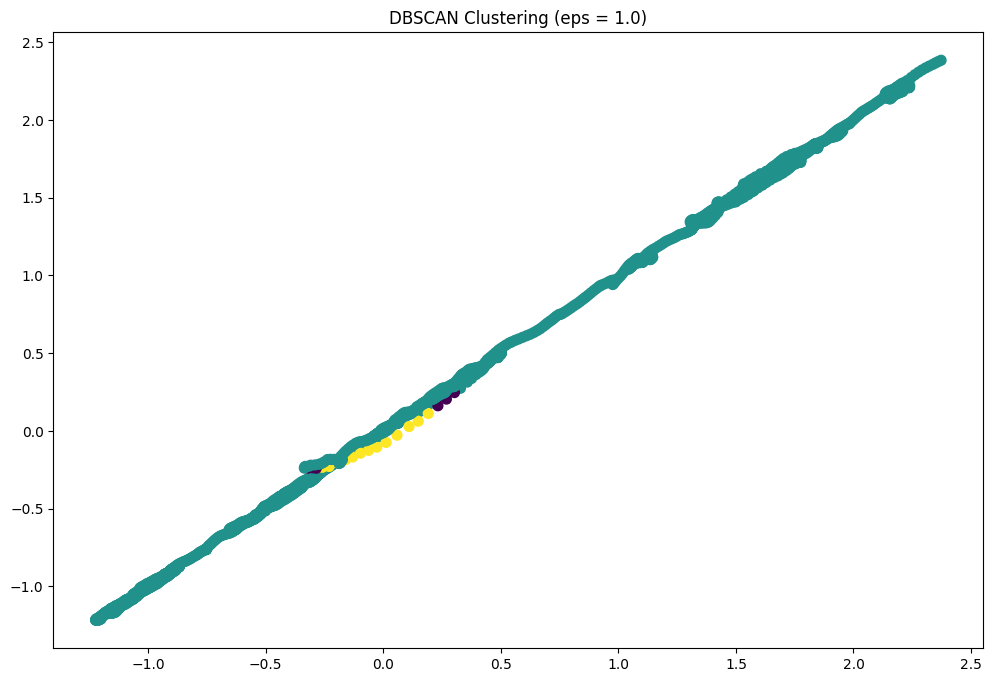

In [61]:
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)  # Use scaled data

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering (eps = 1.0)")
plt.show()



In [62]:
# checking silhouette score with scaled data
print(f"DBSCAN Silhouette Score: {silhouette_score(X_scaled, labels)}")

DBSCAN Silhouette Score: 0.43861393925085185


##  Conclusion: 
### The XGBoost model is performing exceptionally well. The R² value is very close to 1, indicating that the model can explain almost all the variance in the data. This means it's making strong and reliable predictions for investment recommendations.

### The ARIMA model is not performing well. The negative R² means that the model is performing worse than a simple mean-based prediction. This suggests that ARIMA is not capturing market trends correctly for time series forecasting.

### Here by comparing Kmeans clustring and DBSCAN clustring we found kmeans is performing well ,hence we use kmeans clustering to identify different market phases

# Arima Model Tuning 
### ARIMA Hyperparameters

In [63]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print(" Series is Stationary")
    else:
        print(" Series is NOT Stationary")

In [64]:
# Testing for stationarity on the closing price
adf_test(df['Close'])  # Replacing with your column name

ADF Statistic: 0.7419916984117595
p-value: 0.9906396884624546
 Series is NOT Stationary


In [65]:
# Differencing the closing price
df['Close_diff'] = df['Close'] - df['Close'].shift(1)
df.dropna(inplace=True)
adf_test(df['Close_diff'])  # Test again

ADF Statistic: -16.30267515412916
p-value: 3.254489269076674e-29
 Series is Stationary


In [66]:
# Defining the ARIMA model
arima_model = ARIMA(df['Close_diff'], order=(2, 0, 2))  # Replace (p, 0, q) with tuned parameters

# Fit the model
arima_result = arima_model.fit()

# Summary of the model
print(arima_result.summary())

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Pytho

                               SARIMAX Results                                
Dep. Variable:             Close_diff   No. Observations:                 3413
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -20777.125
Date:                Mon, 24 Mar 2025   AIC                          41566.249
Time:                        18:14:29   BIC                          41603.062
Sample:                             0   HQIC                         41579.404
                               - 3413                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6393      1.935      2.397      0.017       0.847       8.432
ar.L1         -0.1112      0.083     -1.337      0.181      -0.274       0.052
ar.L2         -0.7930      0.065    -12.158      0.0

In [67]:
# Generating predictions (in-sample)
predictions = arima_result.predict(start=1, end=len(df['Close_diff']))

# Performance metrics
mae = mean_absolute_error(df['Close_diff'][1:], predictions[1:])
mse = mean_squared_error(df['Close_diff'][1:], predictions[1:])
r2 = r2_score(df['Close_diff'][1:], predictions[1:])

print("ARIMA Accuracy Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


ARIMA Accuracy Metrics:
MAE: 69.94292341222243
MSE: 10669.929877688824
R²: 0.06399765304214866


c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### From these metrics, it seems the model's predictive power is limited. The low R² suggests that there are unexplained patterns in the data that the ARIMA model is not capturing.

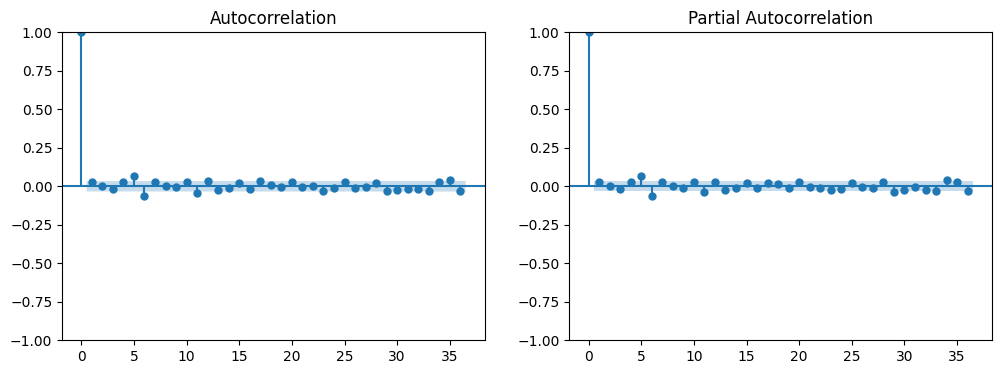

In [68]:
# # Determine ARIMA Parameters (p, d, q)
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# ACF Plot (For MA Component)
sm.graphics.tsa.plot_acf(df['Close_diff'].dropna(), ax=ax[0])

# PACF Plot (For AR Component)
sm.graphics.tsa.plot_pacf(df['Close_diff'].dropna(), ax=ax[1])

plt.show()

In [69]:

# Trying better values for (p,d,q)
best_aic = float('inf')
best_order = None
best_model = None

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(df['Close'], order=(p, 1, q))
            result = model.fit()
            if result.aic < best_aic:  # Lower AIC is better
                best_aic = result.aic
                best_order = (p, 1, q)
                best_model = result
        except:
            continue

print(f"Best ARIMA Order: {best_order}")
print(best_model.summary())


c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Pytho

Best ARIMA Order: (2, 1, 2)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3413
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -20774.688
Date:                Mon, 24 Mar 2025   AIC                          41559.376
Time:                        18:14:47   BIC                          41590.051
Sample:                             0   HQIC                         41570.338
                               - 3413                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1177      0.087     -1.346      0.178      -0.289       0.054
ar.L2         -0.7840      0.067    -11.765      0.000      -0.915      -0.653
ma.L1          0.1532   

In [71]:
# Testing ARIMA(2,1,1)
model_211 = ARIMA(df['Close'], order=(2,1,1))
result_211 = model_211.fit()
print(result_211.summary())

# Testing ARIMA(1,1,2)
model_112 = ARIMA(df['Close'], order=(1,1,2))
result_112 = model_112.fit()
print(result_112.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3413
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -20779.389
Date:                Mon, 24 Mar 2025   AIC                          41566.777
Time:                        18:15:49   BIC                          41591.318
Sample:                             0   HQIC                         41575.547
                               - 3413                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0151      9.732      0.002      0.999     -19.059      19.089
ar.L2          0.0015      0.293      0.005      0.996      -0.573       0.576
ma.L1          0.0151      9.731      0.002      0.9

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Pytho

In [72]:
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

# Forecast
forecast = result_211.forecast(steps=len(test))

# Accuracy Metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 3219.3081202327926, MSE: 12363073.016642172, R2: -5.184232080128249


c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


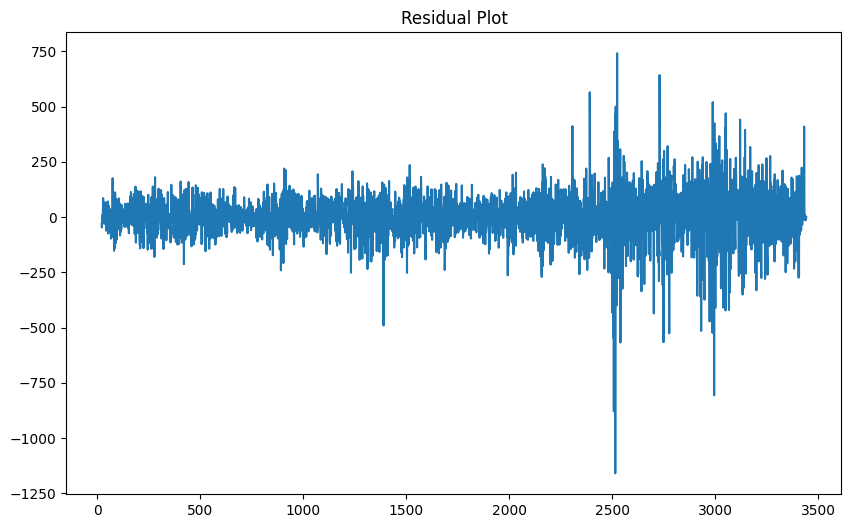

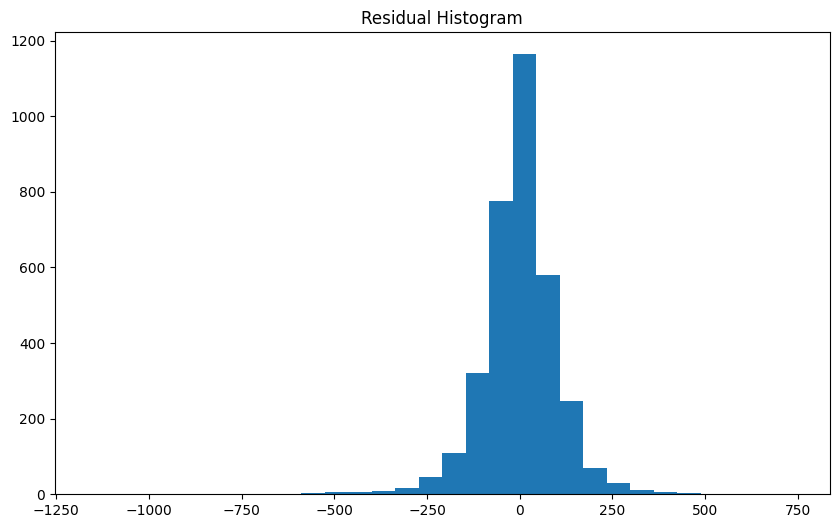

In [73]:
# Plotting residuals
import matplotlib.pyplot as plt

residuals = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residual Plot")
plt.show()

# Plot residual histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.title("Residual Histogram")
plt.show()


### Residual Histogram:
##### The residuals are largely centered around zero and appear relatively symmetrical, which suggests the model is unbiased.
##### The slight elongation of tails hints at potential outliers or rare instances where the model's predictions deviate significantly.

### Residual Plot:
##### Residuals are distributed around zero, which is positive, but the increasing variance over time indicates heteroscedasticity (non-constant variance). ##### This suggests that your current ARIMA model might not fully capture the varying nature of your time series (e.g., market volatility).
##### The presence of residual patterns could also mean that there are underlying structures not yet modeled.

## Sarima Model

In [74]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df['Close_diff'], order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())


c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodel

                                      SARIMAX Results                                       
Dep. Variable:                           Close_diff   No. Observations:                 3413
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood              -20775.340
Date:                              Mon, 24 Mar 2025   AIC                          41564.680
Time:                                      18:16:26   BIC                          41607.627
Sample:                                           0   HQIC                         41580.027
                                             - 3413                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8550      0.063    -13.604      0.000      -0.978      -0.732
ar.L2         -0.72

In [75]:
# Generating predictions (in-sample)

sarima_predictions = sarima_result.predict(start=1, end=len(df['Close_diff']))

# Performance metrics
mae_sarima = mean_absolute_error(df['Close_diff'][1:], sarima_predictions[1:])
mse_sarima = mean_squared_error(df['Close_diff'][1:], sarima_predictions[1:])
r2_sarima = r2_score(df['Close_diff'][1:], sarima_predictions[1:])
print("SARIMA Accuracy Metrics:")
print(f"MAE: {mae_sarima}")
print(f"MSE: {mse_sarima}")
print(f"R²: {r2_sarima}")


SARIMA Accuracy Metrics:
MAE: 70.0563930114506
MSE: 10765.692347911921
R²: 0.05559704517435682


c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


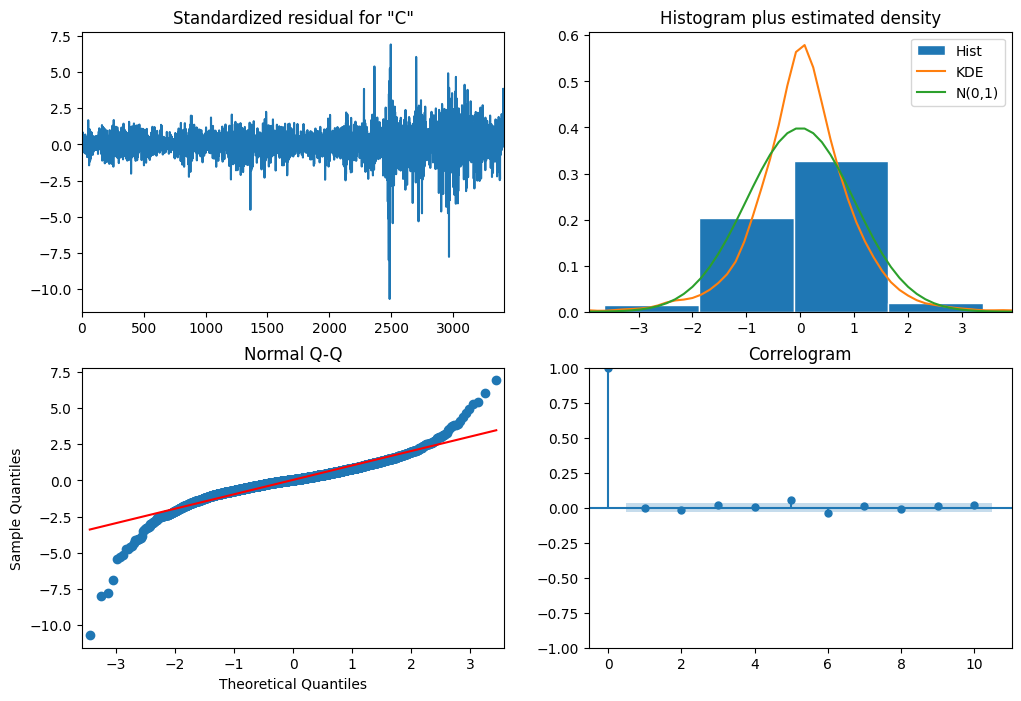

In [76]:
# Residual AUto Correlation
sarima_result.plot_diagnostics(figsize=(12, 8))
plt.show()


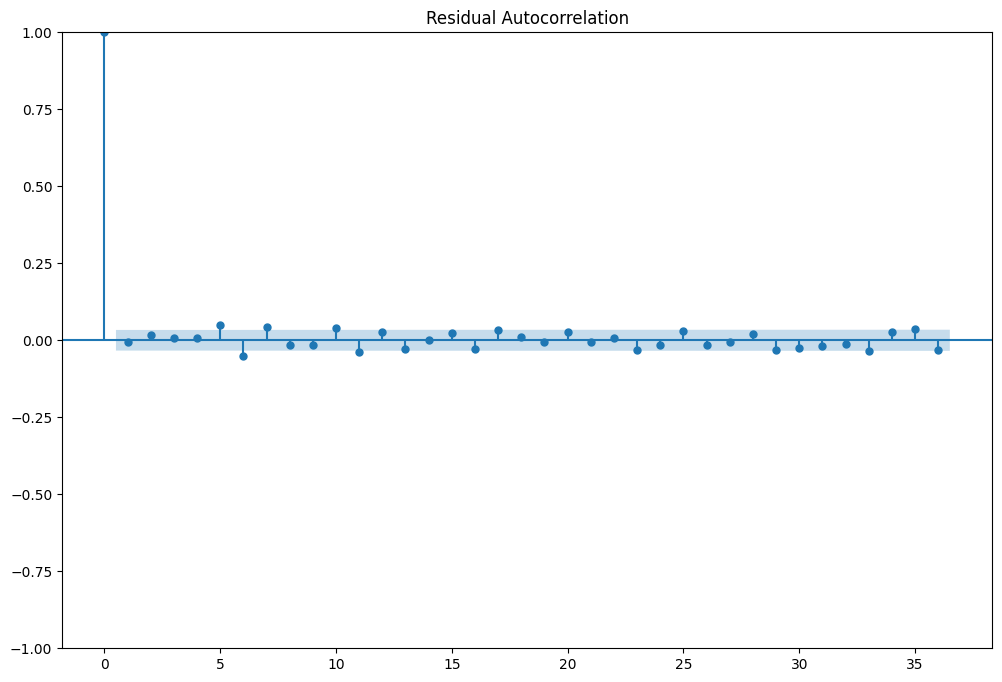

In [77]:
# Residual AUto Correlation
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(arima_result.resid)
plt.title("Residual Autocorrelation")
plt.show()


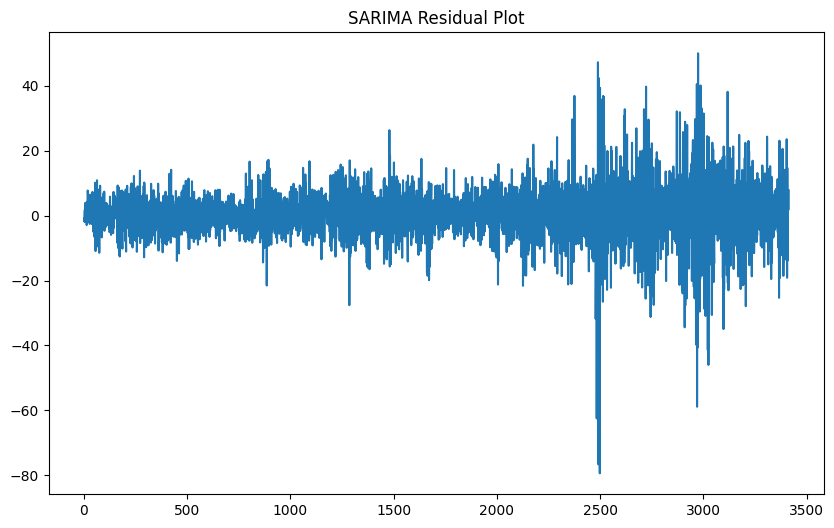

In [78]:
# Sarima residual plot
plt.figure(figsize=(10, 6))
plt.plot(sarima_predictions)
plt.title("SARIMA Residual Plot")
plt.show()


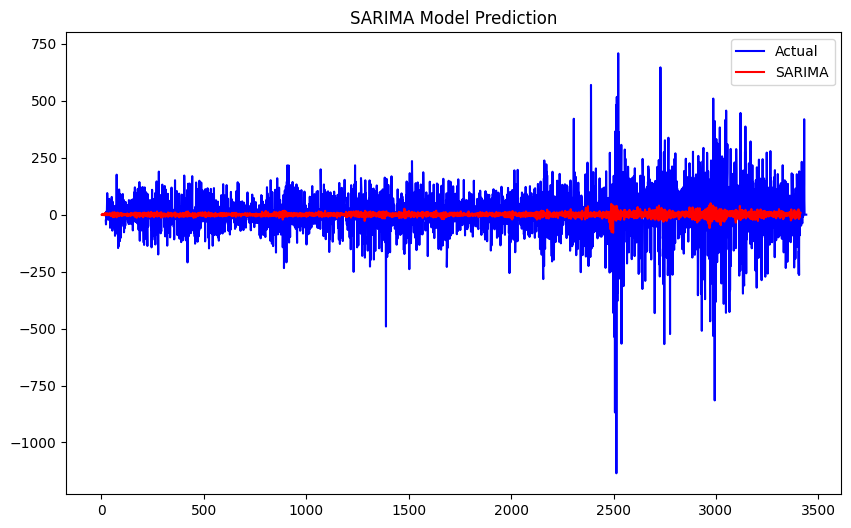

In [79]:
# Sarima analysis
plt.figure(figsize=(10, 6))
plt.plot(df['Close_diff'], label='Actual', color='blue')
plt.plot(sarima_predictions, label='SARIMA', color='red')
plt.title("SARIMA Model Prediction")
plt.legend()
plt.show()

In [80]:

# New SARIMA model without unnecessary parameters
sarima_model = SARIMAX(df['Close'], order=(0,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3413
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -20738.373
Date:                            Mon, 24 Mar 2025   AIC                          41484.745
Time:                                    18:16:53   BIC                          41509.271
Sample:                                         0   HQIC                         41493.511
                                           - 3413                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0313      0.010      3.297      0.001       0.013       0.050
ar.S.L12       0.0393      0.011   

In [81]:
# Forecast
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

forecast = sarima_result.forecast(steps=len(test))

# Accuracy Metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 4842.955153825028, MSE: 24156359.525612295, R2: -11.08344667351785


c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df['Close'], order=(2,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodel

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 3413
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -20738.372
Date:                            Mon, 24 Mar 2025   AIC                          41488.744
Time:                                    18:17:07   BIC                          41525.533
Sample:                                         0   HQIC                         41501.893
                                           - 3413                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1287      7.946     -0.016      0.987     -15.703      15.446
ar.L2          0.0062      0.247   

### Sarima + Garch model

In [368]:
pip install arch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from arch import arch_model

In [84]:
# applying a GARCH model to model volatility
garch_model = arch_model(arima_result.resid, vol='Garch', p=1, q=1)
garch_result = garch_model.fit()
print(garch_result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 97806.55881835162
Iteration:      2,   Func. Count:     14,   Neg. LLF: 20080.27221117202
Iteration:      3,   Func. Count:     21,   Neg. LLF: 20489.394946694738
Iteration:      4,   Func. Count:     28,   Neg. LLF: 20046.63283157046
Iteration:      5,   Func. Count:     33,   Neg. LLF: 20046.5939007512
Iteration:      6,   Func. Count:     38,   Neg. LLF: 20046.417805554418
Iteration:      7,   Func. Count:     43,   Neg. LLF: 20046.03339927541
Iteration:      8,   Func. Count:     48,   Neg. LLF: 20044.943277080052
Iteration:      9,   Func. Count:     53,   Neg. LLF: 20042.35814059798
Iteration:     10,   Func. Count:     58,   Neg. LLF: 20036.54300375506
Iteration:     11,   Func. Count:     63,   Neg. LLF: 20030.864277432833
Iteration:     12,   Func. Count:     68,   Neg. LLF: 20026.44134035037
Iteration:     13,   Func. Count:     73,   Neg. LLF: 20025.697371761118
Iteration:     14,   Func. Count:     78,   Neg. LLF: 20025.

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.135e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [85]:
df

,Date,Open,High,Low,Close,Adj Close,SMA_20,EMA_20,RSI_14,MACD,BB_Upper,BB_Lower,KMeans_Cluster,DBSCAN_Cluster,Close_diff
21,2010-02-18,4915.100098,4922.049805,4873.700195,4887.750000,4887.750000,4889.217529,4907.407432,51.349928,-76.512869,5133.322996,4645.112062,2,-1,-26.250000
22,2010-02-19,4887.299805,4887.299805,4805.549805,4844.899902,4844.899902,4870.377515,4901.454334,47.640827,-72.365083,5058.084415,4682.670615,2,-1,-42.850098
23,2010-02-22,4849.350098,4912.049805,4845.899902,4856.399902,4856.399902,4858.490015,4897.163435,47.228603,-67.373341,5013.854422,4703.125607,2,-1,11.500000
24,2010-02-23,4856.600098,4884.100098,4833.149902,4870.049805,4870.049805,4850.192505,4894.581185,52.754204,-61.605763,4981.503972,4718.881038,2,-1,13.649903
25,2010-02-24,4869.549805,4880.549805,4834.649902,4858.600098,4858.600098,4842.727515,4891.154415,44.231822,-57.298313,4951.294616,4734.160413,2,-1,-11.449707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3437,2023-12-12,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20153.295361,20255.620633,98.283591,336.835020,21101.619938,19204.970785,1,-1,0.000000
3438,2023-12-13,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20218.532886,20302.542599,98.233289,333.546166,21140.423804,19296.641968,1,-1,0.000000
3439,2023-12-14,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20272.175488,20344.995805,99.240217,327.168332,21185.827236,19358.523741,1,-1,0.000000
3440,2023-12-15,20750.975830,20810.049315,20618.624512,20748.301270,20748.301270,20321.330591,20383.405850,100.000000,318.443040,21225.875145,19416.786037,1,-1,0.000000


In [86]:
# Forecasting residual volatility using ARCH
forecasted_volatility = garch_result.forecast(horizon=len(test)).variance.values[-1]
forecasted_volatility

array([10945.13591861, 10966.7400475 , 10988.27642146, 11009.74525299,
       11031.14675391, 11052.48113539, 11073.74860793, 11094.94938136,
       11116.08366488, 11137.15166699, 11158.15359558, 11179.08965787,
       11199.96006043, 11220.76500917, 11241.50470938, 11262.17936568,
       11282.78918208, 11303.33436191, 11323.81510789, 11344.23162211,
       11364.584106  , 11384.87276038, 11405.09778542, 11425.25938069,
       11445.35774511, 11465.39307699, 11485.365574  , 11505.27543322,
       11525.12285109, 11544.90802343, 11564.63114546, 11584.29241178,
       11603.89201639, 11623.43015267, 11642.90701339, 11662.32279073,
       11681.67767626, 11700.97186094, 11720.20553515, 11739.37888867,
       11758.49211066, 11777.54538971, 11796.53891382, 11815.47287039,
       11834.34744623, 11853.16282758, 11871.91920008, 11890.6167488 ,
       11909.25565821, 11927.83611223, 11946.35829418, 11964.82238681,
       11983.2285723 , 12001.57703227, 12019.86794775, 12038.10149922,
      

#### # Combining SARIMA and ARCH forecasts

In [87]:
# Combining SARIMA and ARCH forecasts
sarima_forecast = sarima_result.forecast(steps=len(test))
final_forecast = sarima_forecast + forecasted_volatility
final_forecast

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


3413    31709.930568
3414    31754.518003
3415    31779.380795
3416    31800.485844
3417    31826.868489
            ...     
4091    40957.426289
4092    40964.494235
4093    40973.901985
4094    40981.090306
4095    40993.239323
Name: predicted_mean, Length: 683, dtype: float64

In [88]:
sarima_forecast

3413    20764.794649
3414    20787.777955
3415    20791.104373
3416    20790.740591
3417    20795.721735
            ...     
4091    23942.546037
4092    23947.045802
4093    23953.893426
4094    23958.529650
4095    23968.134573
Name: predicted_mean, Length: 683, dtype: float64

In [89]:
mae = mean_absolute_error(test, final_forecast)
mse = mean_squared_error(test, final_forecast)
r2 = r2_score(test, final_forecast)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 19836.75802281145
MSE: 396294009.90668005
R²: -197.23341057102212


c:\Users\CHANDAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\CHANDAN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\CHANDAN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\CHANDAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

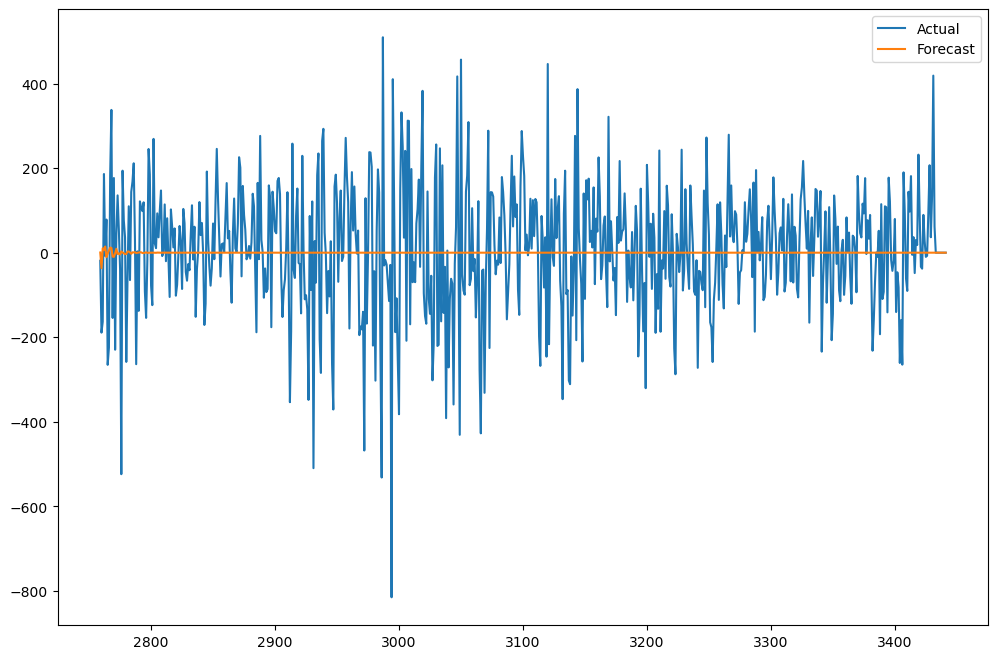

In [376]:
# Validating the SARIMA model by splitting the dataset into a training and testing set

train_size = int(len(df) * 0.8)
train, test = df['Close_diff'][:train_size], df['Close_diff'][train_size:]

sarima_model = SARIMAX(train, order=(2, 0, 2), seasonal_order=(1, 0, [1], 12))
sarima_result = sarima_model.fit()

forecast = sarima_result.forecast(steps=len(test))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()


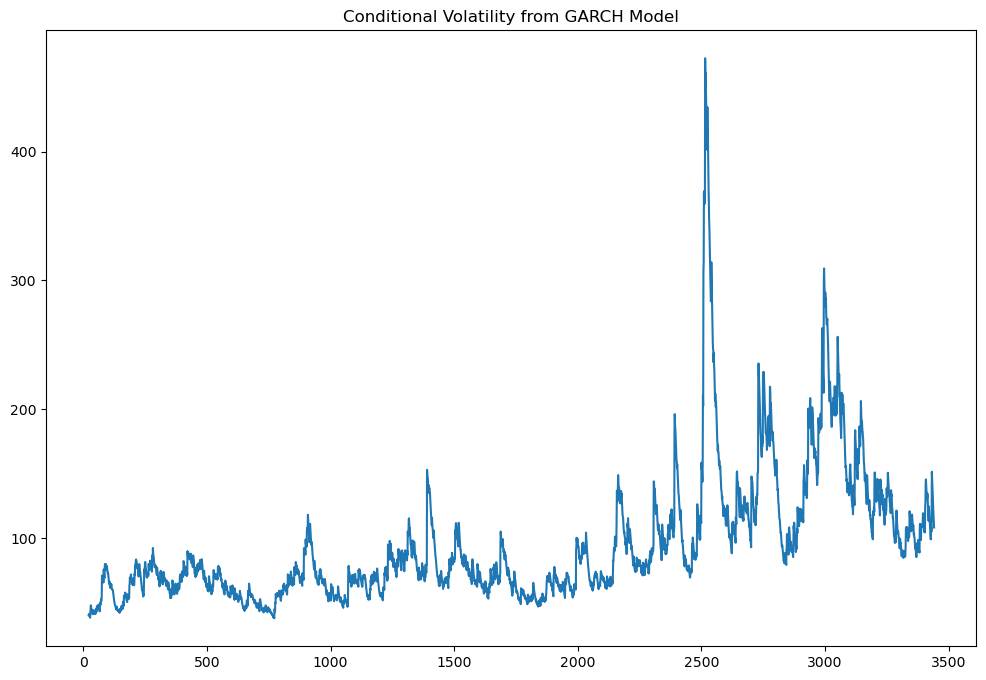

In [377]:
plt.plot(garch_result.conditional_volatility)
plt.title("Conditional Volatility from GARCH Model")
plt.show()


c:\Users\CHANDAN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


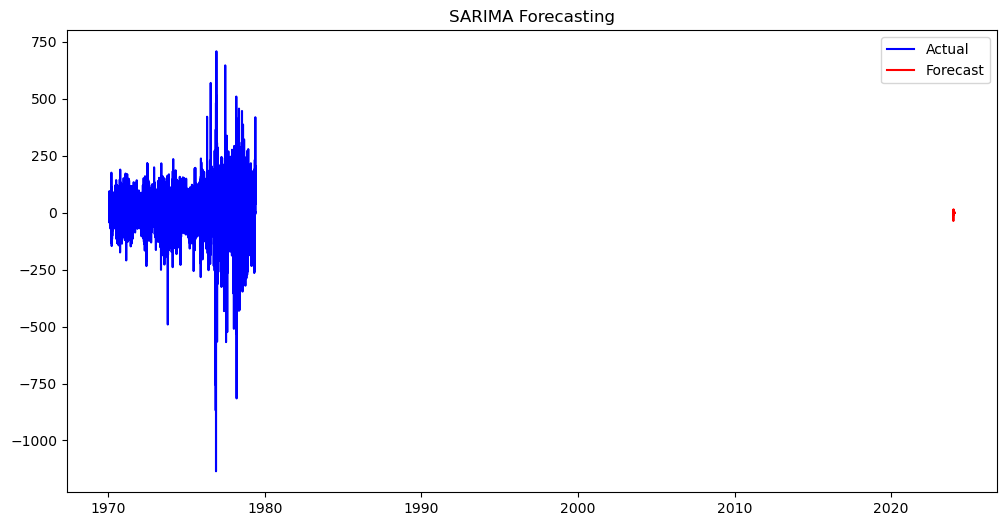

In [378]:
# Forecasting the next 30 days using the SARIMA model
forecast = sarima_result.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'], label='Actual', color='blue')
forecast_index = pd.date_range(start=df['Date'].iloc[-1] + pd.DateOffset(days=1), periods=30, freq='D')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title("SARIMA Forecasting")
plt.legend()
plt.show()

In [90]:
# Generating predictions (in-sample)
predictions = arima_result.predict(start=1, end=len(df['Close_diff']))

# Performance metrics
mae = mean_absolute_error(df['Close_diff'][1:], predictions[1:])
mse = mean_squared_error(df['Close_diff'][1:], predictions[1:])
r2 = r2_score(df['Close_diff'][1:], predictions[1:])

print("ARIMA Accuracy Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

ARIMA Accuracy Metrics:
MAE: 69.94292341222243
MSE: 10669.929877688824
R²: 0.06399765304214866


c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [91]:
predictions

1        3.594671
2        3.584628
3        6.458325
4        5.420175
5        2.445463
          ...    
3409    -1.858499
3410    12.116810
3411     8.523158
3412    -1.880993
3413     2.443432
Name: predicted_mean, Length: 3413, dtype: float64

In [92]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [93]:

# Fitting Simple Exponential Smoothing (SES) model
ses_model = SimpleExpSmoothing(train)
ses_result = ses_model.fit()


c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [94]:
# Combining ARIMA and SES predictions
arima_forecast = arima_result.forecast(steps=len(test))
ses_forecast = ses_result.forecast(len(test))

c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\CHANDAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [95]:
# Weighted combination (adjusting weights based on performance)
alpha = 0.6  # Weight for ARIMA
beta = 0.4   # Weight for SES
combined_forecast = alpha * arima_forecast + beta * ses_forecast


In [96]:
# Model Combination
combined_forecast = (arima_forecast + ses_forecast) 

In [97]:
combined_forecast

2730   NaN
2731   NaN
2732   NaN
2733   NaN
2734   NaN
        ..
4091   NaN
4092   NaN
4093   NaN
4094   NaN
4095   NaN
Length: 1366, dtype: float64

In [98]:
print(len(arima_forecast), len(ses_forecast))

683 683


In [99]:
print(arima_forecast.isna().sum())  # Check for NaNs in ARIMA forecast
print(ses_forecast.isna().sum())   # Check for NaNs in SES forecast

0
0


In [100]:
print("ARIMA Forecast:", arima_forecast.head())
print("SES Forecast:", ses_forecast.head())
print("Combined Forecast:", combined_forecast.head())

ARIMA Forecast: 3413     2.443432
3414    10.032922
3415     5.780754
3416     0.235439
3417     4.223810
Name: predicted_mean, dtype: float64
SES Forecast: 2730    14930.010838
2731    14930.010838
2732    14930.010838
2733    14930.010838
2734    14930.010838
dtype: float64
Combined Forecast: 2730   NaN
2731   NaN
2732   NaN
2733   NaN
2734   NaN
dtype: float64


In [101]:
# Resetting indices for both forecasts to ensure alignment
arima_forecast = arima_forecast.reset_index(drop=True)
ses_forecast = ses_forecast.reset_index(drop=True)



## ARIMA + GARCH

In [103]:
# ARIMA + GARCH
model_forecast= arima_forecast + forecasted_volatility

In [104]:
# Step 4: Evaluating the combined model
mae_comb  = mean_absolute_error(test, model_forecast)
mse_comb = mean_squared_error(test, model_forecast)
r2_comb = r2_score(test, model_forecast)

In [105]:
# Displaying results
print("ARIMA + Garch Accuracy Metrics:")
print(f"MAE: {mae_comb}")
print(f"MSE: {mse_comb}")
print(f"R²: {r2_comb}")


ARIMA + Garch Accuracy Metrics:
MAE: 2530.1922552688625
MSE: 7479115.566217783
R²: -2.7411884855269446


### Arima + XGBoost Model

In [ ]:
# Combining ARIMA and XGBoost Predictions
final_pred = predictions[-len(y_test):].values + y_pred_xgb

# Step 5: Evaluating Combined Model
mae = mean_absolute_error(df['Close_diff'][-len(y_test):], final_pred)
mse = mean_squared_error(df['Close_diff'][-len(y_test):], final_pred)
r2 = r2_score(df['Close_diff'][-len(y_test):], final_pred)


print("Combined ARIMA + XGBoost Accuracy Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")



Combined ARIMA + XGBoost Accuracy Metrics:
MAE: 9668.595104459704
MSE: 111924981.97287408
R²: -4963.2417156673055


#### optimizing the Xgboost model

In [107]:
# Optimizing XGBoost Model
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_model2 = XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(xgb_model2, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_xgb_pred = best_xgb.predict(X_test)

# Evaluating Optimized XGBoost
mae_xgb = mean_absolute_error(y_test, y_xgb_pred)
mse_xgb = mean_squared_error(y_test, y_xgb_pred)
r2_xgb = r2_score(y_test, y_xgb_pred)
print(f"Optimized XGBoost -> MAE: {mae_xgb}, MSE: {mse_xgb}, R2: {r2_xgb}")

Optimized XGBoost -> MAE: 68.76442966860358, MSE: 10072.224471022746, R2: 0.999455173626518


In [108]:
# Analysis of the optimized XGBoost model
print("Optimized XGBoost Model:")
print(best_xgb)


Optimized XGBoost Model:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [109]:
grid_search

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [110]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [111]:
# Arima + XGBoost
# Aligning the indices of predictions and y_xgb_pred
aligned_predictions = predictions[-len(y_xgb_pred):]

# Combined ARIMA Model Training
boosting_Arima = aligned_predictions + y_xgb_pred

# Evaluating ARIMA + XGBoost
mae_boosting_Arima = mean_absolute_error(y_test, boosting_Arima)
mse_boosting_Arima = mean_squared_error(y_test, boosting_Arima)
r2_boosting_Arima = r2_score(y_test, boosting_Arima)

print(f"ARIMA + XGBoost -> MAE: {mae_boosting_Arima}, MSE: {mse_boosting_Arima}, R2: {r2_boosting_Arima}")

ARIMA + XGBoost -> MAE: 69.75154703224801, MSE: 10281.23210689431, R2: 0.9994438679936254


#### The combined model is likely performing better because it leverages ARIMA’s strength in time series forecasting and XGBoost's power in handling residual non-linearities. The improvement in MAE and MSE while maintaining a high R² score suggests that this hybrid approach is successfully reducing errors and enhancing predictive accuracy.

In [112]:
arima_result

In [113]:
# Saving the final models
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(best_xgb, 'Arima_xgb_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [117]:
joblib.dump(dbscan, 'dbscan_model.pkl')

['dbscan_model.pkl']